In [ ]:
!pip install pandas-datareader

In [ ]:
import pandas_datareader as pdr
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
plt.rcParams['figure.figsize'] = [12, 4]

## 1. Dataset

In [ ]:
df = web.DataReader('TSLA', 'stooq')
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2025-01-28,396.91,400.59,386.50,398.09,48910676
2025-01-27,394.80,406.69,389.00,397.15,58125510
2025-01-24,414.45,418.88,405.78,406.58,56427149
2025-01-23,416.06,420.73,408.95,412.38,50690592
2025-01-22,416.81,428.00,414.59,415.11,60963342


In [ ]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2020-02-06,46.6600,53.0567,45.8000,49.9300,598211280
2020-02-05,54.8833,56.4000,46.9400,48.9800,726357555
2020-02-04,58.8633,64.6000,55.5933,59.1367,914081370
2020-02-03,44.9133,52.4100,44.9000,52.0000,708502425
2020-01-31,42.6667,43.5333,42.1667,43.3700,235788990


In [ ]:
df = df.sort_index()
df

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-31,42.6667,43.5333,42.1667,43.3700,235788990
2020-02-03,44.9133,52.4100,44.9000,52.0000,708502425
2020-02-04,58.8633,64.6000,55.5933,59.1367,914081370
2020-02-05,54.8833,56.4000,46.9400,48.9800,726357555
2020-02-06,46.6600,53.0567,45.8000,49.9300,598211280
...,...,...,...,...,...
2025-01-22,416.8100,428.0000,414.5900,415.1100,60963342
2025-01-23,416.0600,420.7300,408.9500,412.3800,50690592
2025-01-24,414.4500,418.8800,405.7800,406.5800,56427149


<Axes: xlabel='Date'>

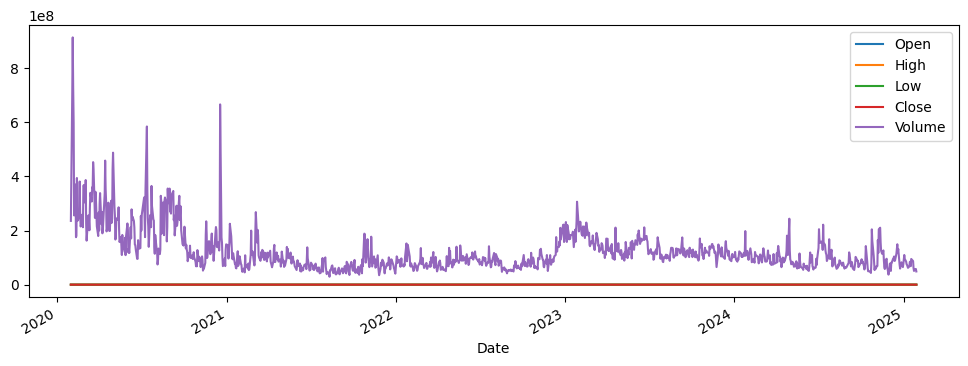

In [ ]:
df.plot()

<Axes: title={'center': 'high'}, xlabel='Date'>

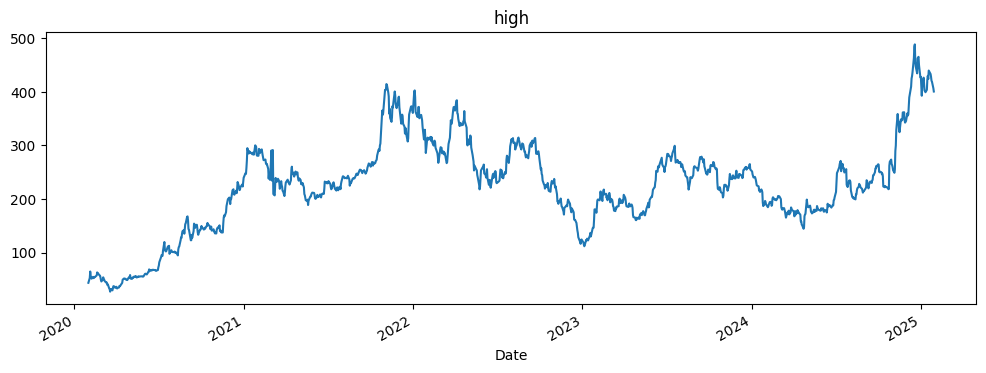

In [ ]:
df['High'].plot(title='high')

limits

<Axes: title={'center': 'high for 2024'}, xlabel='Date'>

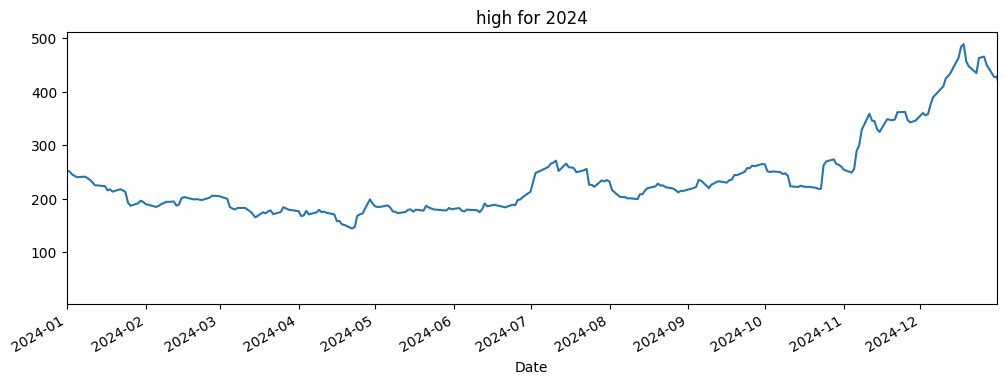

In [ ]:
df['High'].plot(xlim=['2024-01-01', '2024-12-31'], title='high for 2024')

## 2. Indexing

In [ ]:
df.index

DatetimeIndex(['2020-01-31', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07', '2020-02-10', '2020-02-11',
               '2020-02-12', '2020-02-13',
               ...
               '2025-01-14', '2025-01-15', '2025-01-16', '2025-01-17',
               '2025-01-21', '2025-01-22', '2025-01-23', '2025-01-24',
               '2025-01-27', '2025-01-28'],
              dtype='datetime64[ns]', name='Date', length=1255, freq=None)

In [ ]:
index = df.loc["2023-01-02":"2025-01-01"].index
index

DatetimeIndex(['2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-17',
               ...
               '2024-12-17', '2024-12-18', '2024-12-19', '2024-12-20',
               '2024-12-23', '2024-12-24', '2024-12-26', '2024-12-27',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', name='Date', length=502, freq=None)

In [ ]:
share_open = df.loc["2023-01-02":"2025-01-01"]['Open']
share_open

,Open
Date,
2023-01-03,118.47
2023-01-04,109.11
2023-01-05,110.51
2023-01-06,103.00
2023-01-09,118.96
...,...
2024-12-24,435.90
2024-12-26,465.16
2024-12-27,449.52


Text(0.5, 1.0, 'share open 2023-2025')

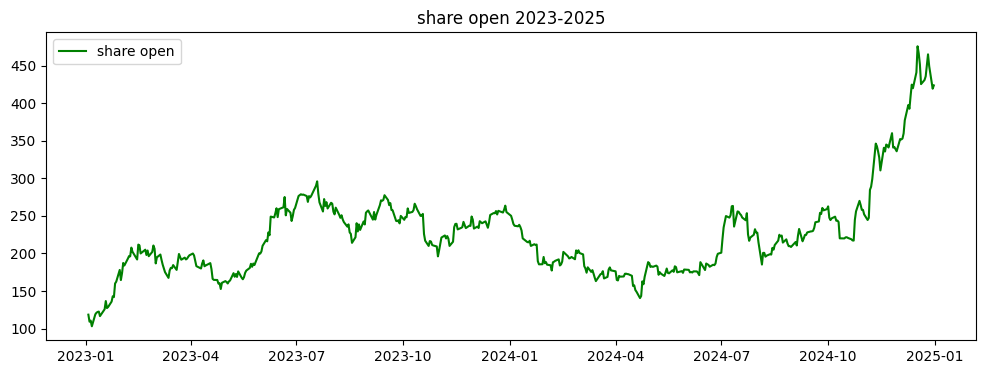

In [ ]:
fig, ax = plt.subplots()
ax.plot(index, share_open, label='share open', c='g')
ax.legend()
plt.title('share open 2023-2025')

In [ ]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume
0,2020-01-31,42.6667,43.5333,42.1667,43.3700,235788990
1,2020-02-03,44.9133,52.4100,44.9000,52.0000,708502425
2,2020-02-04,58.8633,64.6000,55.5933,59.1367,914081370
3,2020-02-05,54.8833,56.4000,46.9400,48.9800,726357555
4,2020-02-06,46.6600,53.0567,45.8000,49.9300,598211280


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1255 non-null   datetime64[ns]
 1   Open    1255 non-null   float64       
 2   High    1255 non-null   float64       
 3   Low     1255 non-null   float64       
 4   Close   1255 non-null   float64       
 5   Volume  1255 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 59.0 KB


In [ ]:
df.set_index('Date', drop=True, inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-31,42.6667,43.5333,42.1667,43.3700,235788990
2020-02-03,44.9133,52.4100,44.9000,52.0000,708502425
2020-02-04,58.8633,64.6000,55.5933,59.1367,914081370
2020-02-05,54.8833,56.4000,46.9400,48.9800,726357555
2020-02-06,46.6600,53.0567,45.8000,49.9300,598211280


## 3. Time Resampling
  * groups data into bins, where each bin represents the period mentioned in the rule
  * rules:
      * YE - year end frequency
      * QS - quarter start frequency

In [ ]:
df.resample(rule='YE').max()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,233.330,239.5730,230.3730,235.223,914081370
2021-12-31,411.470,414.4970,405.6670,409.970,268189377
2022-12-31,396.517,402.6670,378.6800,399.927,221923313
2023-12-31,296.040,299.2900,289.5201,293.340,306590613
2024-12-31,475.900,488.5399,457.5101,479.860,243869678
2025-12-31,432.640,439.7400,419.7500,428.220,109710749


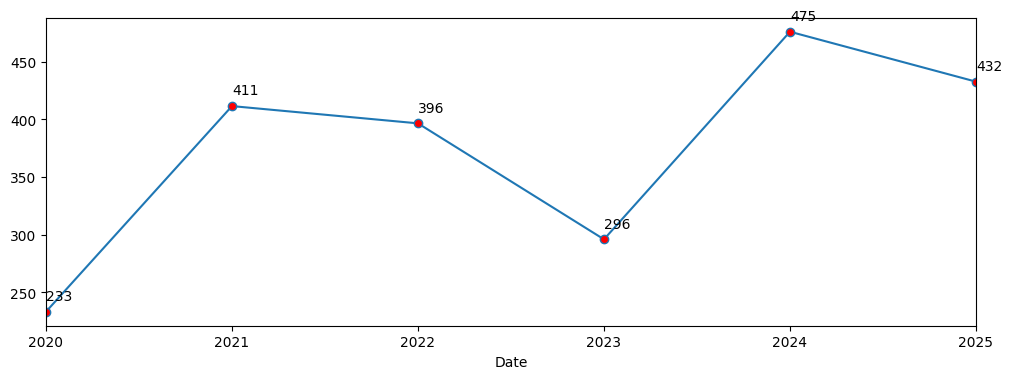

In [ ]:
# year end max freq
ye_max = df.resample(rule='YE').max()['Open']

ye_max.plot(marker='o', markerfacecolor='red')
for i, value in enumerate(ye_max):
  plt.text(
      x=ye_max.index[i],
      y=value+10,
      s=int(value),
  )

<Axes: xlabel='Date'>

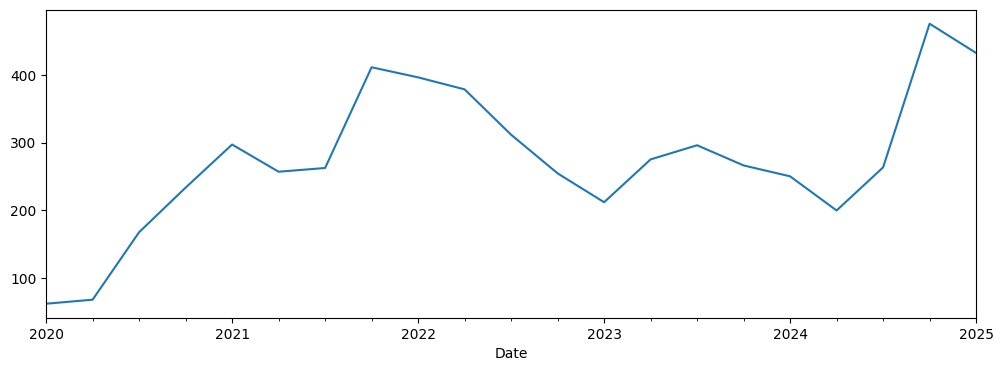

In [ ]:
# quarter end freq
df.resample(rule='QE').max()['Open'].plot()

In [ ]:
# business year end freq
ba_max = df.resample(rule='BA').max()
ba_max

<ipython-input-20-25982f608fa4>:2: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  ba_max = df.resample(rule='BA').max()


,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,233.330,239.5730,230.3730,235.223,914081370
2021-12-31,411.470,414.4970,405.6670,409.970,268189377
2022-12-30,396.517,402.6670,378.6800,399.927,221923313
2023-12-29,296.040,299.2900,289.5201,293.340,306590613
2024-12-31,475.900,488.5399,457.5101,479.860,243869678
2025-12-31,432.640,439.7400,419.7500,428.220,109710749


<Axes: xlabel='Date'>

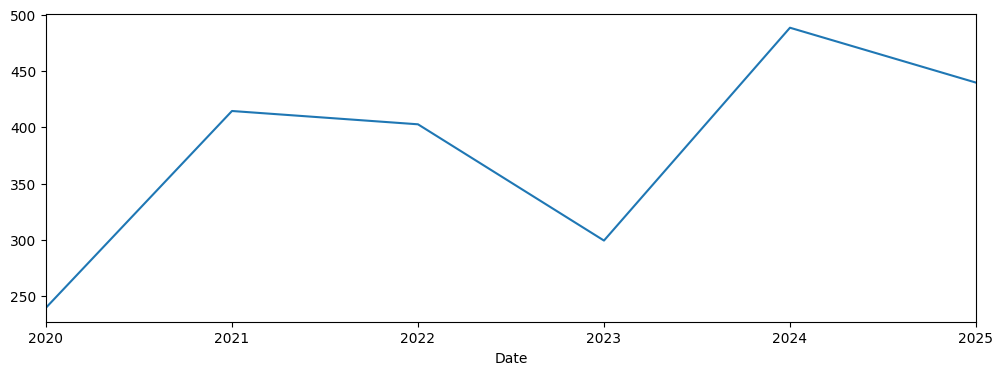

In [ ]:
ba_max['High'].plot()

In [ ]:
# quarter start freq
qs_max = df.resample(rule='QS').max()
qs_max

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-01,61.5667,64.6000,60.0667,61.1600,914081370
2020-04-01,67.5200,72.5133,66.9167,71.9867,487977105
2020-07-01,167.3800,167.4970,156.8370,166.1070,584780430
2020-10-01,233.3300,239.5730,230.3730,235.2230,666378582
2021-01-01,297.1270,300.1330,290.5330,294.3630,268189377
2021-04-01,256.9000,260.2630,244.2020,254.1070,147052302
2021-07-01,262.4000,266.3330,258.3330,263.7870,100847295
2021-10-01,411.4700,414.4970,405.6670,409.9700,188556297
2022-01-01,396.5170,402.6670,378.6800,399.9270,152375142


<Axes: xlabel='Date'>

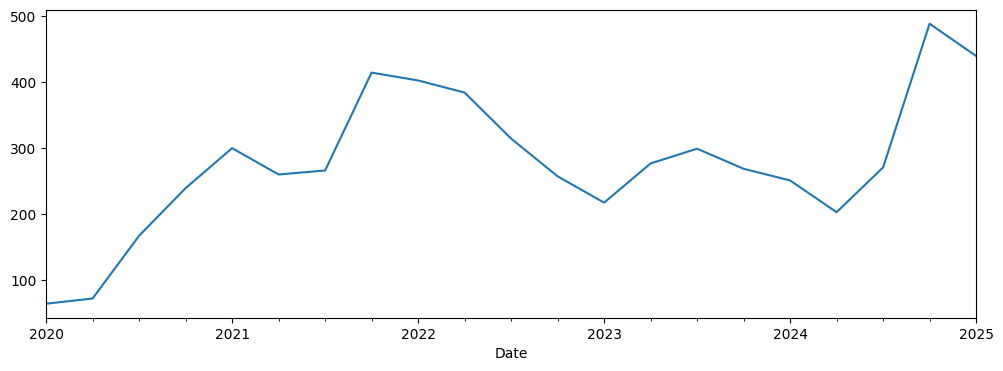

In [ ]:
qs_max['High'].plot()

## 4. Rolling Mean
  * smoothens the line by aggregating over the past values

In [ ]:
df['High'].rolling(10).mean().head(20)

,High
Date,
2020-01-31,NaN
2020-02-03,NaN
2020-02-04,NaN
2020-02-05,NaN
2020-02-06,NaN
2020-02-07,NaN
2020-02-10,NaN
2020-02-11,NaN
2020-02-12,NaN


<Axes: title={'center': 'high with rolling mean'}, xlabel='Date'>

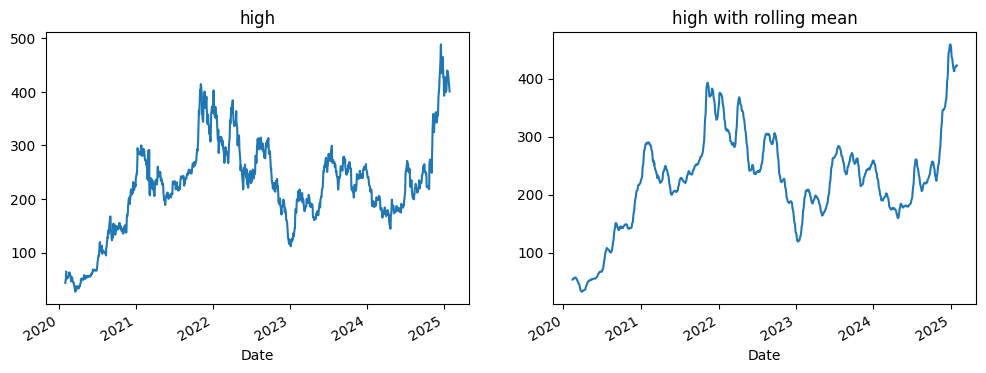

In [ ]:
fig, ax = plt.subplots(1, 2)
ax = ax.flatten()

df['High'].plot(title='high', ax=ax[0])
df['High'].rolling(10).mean().plot(title='high with rolling mean', ax=ax[1])

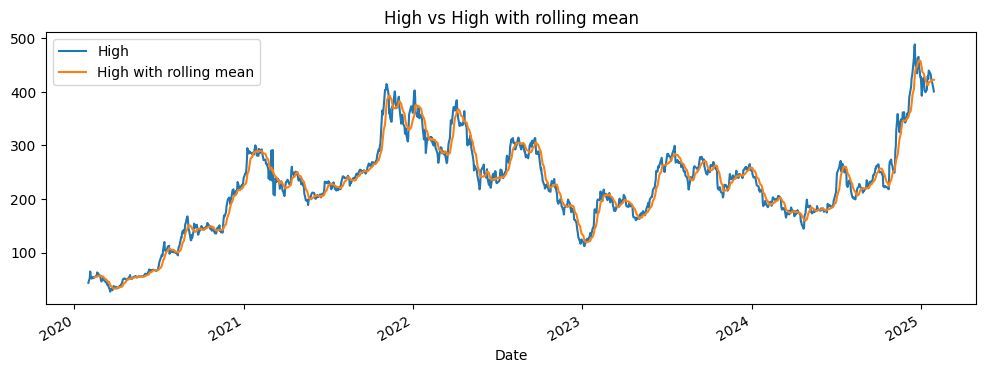

In [ ]:
df['High'].plot(title='High vs High with rolling mean')
df['High'].rolling(10).mean().plot(label='High with rolling mean')
plt.legend()